In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nagoya_Station_data = pd.read_excel("./datas/Nagoya_Station_data.xlsx")

In [12]:
#jrなどの利用者数を合算する為にgroupbyする
datas = Nagoya_Station_data.groupby(['station_name','year'])[['josha_num','lines']].sum()

print(datas)

                   josha_num  lines
station_name year                  
いりなか         1991  3632472.0      1
             1992  3549946.0      1
             1993  3572420.0      1
             1994  3484716.0      1
             1995  3517137.0      1
             1996  3564984.0      1
             1997  3667531.0      1
             1998  3822759.0      1
             1999  3774603.0      1
             2000  3872345.0      1
             2001  5957099.0      1
             2002  4311543.0      1
             2003  3949068.0      1
             2004  2831220.0      1
             2005  2664289.0      1
             2006  2709581.0      1
             2007  2701426.0      1
             2008  2759197.0      1
             2009  2723242.0      1
             2010  2882630.0      1
             2011  2489562.0      1
             2012  2521816.0      1
             2013  2614891.0      1
             2014  2589814.0      1
             2015  2613444.0      1
ささしまライブ      2004   119622.0

In [13]:
#非0のデータを探す
datas['josha_num'].nonzero()[0]

array([   0,    1,    2, ..., 3367, 3368, 3369])

In [18]:
#非0のデータとして、nz_datasを定義
nz_datas=datas[['josha_num','lines']].iloc[datas['josha_num'].nonzero()[0]]
nz_datas

josha_num  lines
station_name year                  
いりなか         1991  3632472.0      1
             1992  3549946.0      1
             1993  3572420.0      1
             1994  3484716.0      1
             1995  3517137.0      1
             1996  3564984.0      1
             1997  3667531.0      1
             1998  3822759.0      1
             1999  3774603.0      1
             2000  3872345.0      1
             2001  5957099.0      1
             2002  4311543.0      1
             2003  3949068.0      1
             2004  2831220.0      1
             2005  2664289.0      1
             2006  2709581.0      1
             2007  2701426.0      1
             2008  2759197.0      1
             2009  2723242.0      1
             2010  2882630.0      1
             2011  2489562.0      1
             2012  2521816.0      1
             2013  2614891.0      1
             2014  2589814.0      1
             2015  2613444.0      1
ささしまライブ      2004   119622.0      1
             2005   882339.0      1
             2006   194865.0      1
             2007   195160.0      1
             2008   170932.0      1
...                      ...    ...
黒川           2003  5114826.0      2
             2004  4935770.0      2
             2005  5059561.0      2
             2006  5107456.0      2
             2007  4863088.0      2
             2008  4844763.0      2
             2009  4774441.0      2
             2010  4699496.0      2
             2011  4723563.0      2
             2012  4845255.0      2
             2013  4943361.0      2
             2014  4939585.0      2
             2015  5069276.0      2
ﾅｺﾞﾔﾄﾞｰﾑ前矢田  1999   103513.0      1
             2000   630367.0      1
             2001  1873634.0      1
             2002  1850147.0      1
             2003  1900512.0      1
             2004  2037975.0      1
             2005  2305746.0      1
             2006  3271822.0      1
             2007  3042112.0      1
             2008  3088156.0      1
             2009  3135204.0      1
             2010  3021405.0      1
             2011  3508196.0      1
             2012  3453763.0      1
             2013  3676697.0      1
             2014  3710770.0      1
             2015  3822943.0      1

[3160 rows x 2 columns]

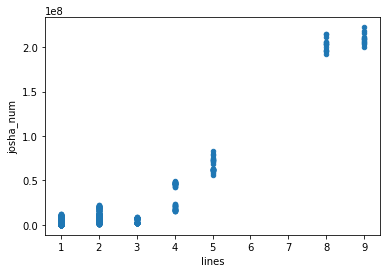

In [19]:
#横軸 駅数、縦軸　年間乗車数
nz_datas.plot(x='lines',y='josha_num', kind='scatter')

In [20]:
nz_datas.describe()

,josha_num,lines
count,3.160000e+03,3160.000000
mean,5.510158e+06,1.319304
std,1.951138e+07,0.921555
min,2.712000e+03,1.000000
25%,1.011673e+06,1.000000
50%,2.105047e+06,1.000000
75%,3.702974e+06,1.000000
max,2.222740e+08,9.000000


In [21]:
#相関係数
np.corrcoef(nz_datas['lines'], nz_datas['josha_num'])

array([[1.        , 0.85435272],
       [0.85435272, 1.        ]])

In [22]:
X=nz_datas.lines.values
# X = np.vstack(datas.sum().lines)
# X = np.array([[value, 1] for value in X])

In [23]:
#Xと同じ長さの列を作成して、1埋めする
A = np.vstack([X, np.ones(len(X))]).T

In [24]:
Y = nz_datas.josha_num.values
#Y=np.c_[Y]

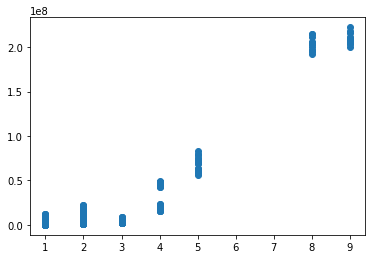

In [25]:
#横軸 駅数、縦軸　年間乗車数

plt.plot(X,Y,'o')

In [26]:
#傾きa, 切片bを求める

a,b = np.linalg.lstsq(A,Y,rcond=None)[0]

In [27]:
print(a,b)

18088559.302316345 -18354146.480176214


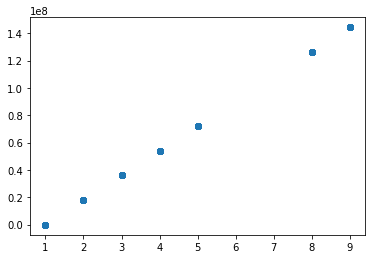

In [28]:
#推定Yのplot
plt.plot(X, a*X + b,'o')

In [31]:
#決定係数を手計算する

#残差計算
child = ((nz_datas['josha_num'] - (nz_datas['lines']*a + b))**2).sum()
child

3.248031395400901e+17

In [32]:
#分母の計算
mother = ((nz_datas['josha_num'] - nz_datas['josha_num'].mean())**2).sum()
mother

1.2026118598902098e+18

In [33]:
#決定係数
R = 1 - child / mother
R

0.7299185627774015